In [1]:
# Imports needed for QRNG
%pip install pylatexenc # matplotlib
%pip install qiskit-aer # Quantum Computer AerSimulator
import numpy as np # used for circuits / math functions
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer # Quantum Computer simulator
from qiskit.visualization import plot_histogram # display results in a Histogram

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Simulator QRNG counts: {'0010': 3, '1010': 4, '0000': 12, '1011': 5, '0011': 6, '0111': 10, '1100': 5, '0110': 3, '1000': 8, '0001': 8, '1111': 6, '1110': 10, '1001': 3, '0101': 6, '1101': 5, '0100': 6}


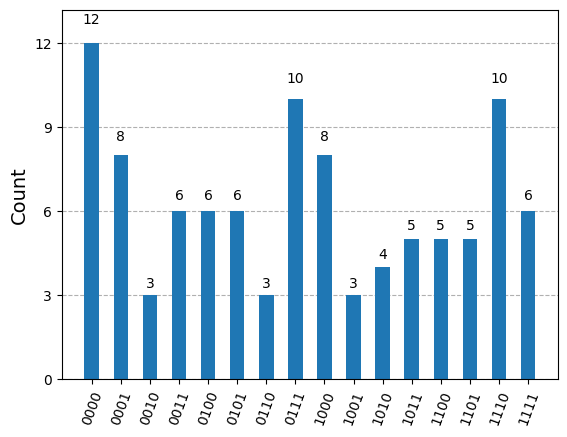

In [10]:
# Required imports
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

num_qubits = 4

# Create a 4-qubit quantum circuit with Hadamard gates to put all qubits in superposition
def create_qrng_circuit(num_qubits):
    qc = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        qc.h(i)  # Apply Hadamard gate to each qubit
    qc.measure_all()  # Measure all qubits
    return qc

# Function to run the QRNG on a Qiskit simulator
def run_qrng_on_simulator(qc, shots=100):
    # Use the Qiskit Aer simulator
    simulator = Aer.get_backend('qasm_simulator')

    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(qc, simulator)

    # Run the transpiled circuit on the simulator
    job = simulator.run(transpiled_circuit, shots=shots)  # Run the transpiled circuit directly

    # Get the counts (measurement results)
    counts = job.result().get_counts()

    return counts

# Create the quantum circuit for the QRNG
qrng_circuit = create_qrng_circuit(num_qubits)

# Run the circuit on the Qiskit simulator
simulator_counts = run_qrng_on_simulator(qrng_circuit, shots=100)
print("Simulator QRNG counts:", simulator_counts)

# Visualize the the generated random numbers in a histogram
plot_histogram(simulator_counts)


In [ ]:
# Using an ACTUAL quantum computer